## Practice
1. Input images from video file WiiPlay.mp4 with frame number between 4820 and 5000 (i.e., level 15).
2. Acquire a face template from the first frame (frame number = 4820).
3. Use <i>cv2.matchTemplate()</i> to perform template matching on subsequent frames.
4. Draw a blue rectangle around each good match and show the output images.
5. (Optional) Use <i>cv2.minMaxLoc()</i> to find the best match and draw a red rectangle around the best match.
6. Observe which method is better ('cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED') 
7. Upload your Jupyter code file (*.ipynb)

In [ ]:
#template matching
import cv2
import numpy as np

cap = cv2.VideoCapture('WiiPlay.mp4')
# Check if the video file is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open the video file")
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#So make sure that you have the right parameters for the right video!
time_length = 210
fps=30
frame_seq = 4820
out_size = (640, 360)
out = cv2.VideoWriter('output.mp4', fourcc, 30.0, out_size)    
cap.set(cv2.CAP_PROP_POS_FRAMES , frame_seq);

ret, img = cap.read()

#cv2.imshow('410821312', img)
#cv2.namedWindow('410821312')    
    
    
#img = cv2.imread('red_blood_cell.jpg', cv2.IMREAD_COLOR)

height, width = img.shape[0:2]
print(img.shape)
show_img = np.copy(img)
mouse_pressed = False
y0 = x0 = w = h = 0

def mouse_callback(event, _x, _y, flags, param):
    global show_img, x0, y0, w, h, mouse_pressed
    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_pressed = True
        x0, y0 = _x, _y
        show_img = np.copy(img)
    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_pressed:
            show_img = np.copy(img)
            cv2.rectangle(show_img, (x0, y0), (_x, _y), (0, 255, 0), 2)
    elif event == cv2.EVENT_LBUTTONUP:
        mouse_pressed = False
        w, h = _x - x0, _y - y0
        
cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

#Acquire a template through mouse dragging
while True:
    cv2.imshow('image', show_img)
    k = cv2.waitKey(1)
    if k == ord('a') and not mouse_pressed:
        if w*h > 0:
            break
cv2.destroyAllWindows()

template = np.copy(img[y0:y0+h, x0:x0+w])
print(template.shape)
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
show_img = np.copy(img)
index = 0
#Perform template matching with various methods (0~5)
q = 0
while True:
    q = q+1
    if q == 5400:
        break
    ret, frame = cap.read()
    #while True:
        
    cv2.imshow('tm', show_img)
    k = cv2.waitKey(1)

    if k == 27:
        break
    elif k != -1:
        index = int(chr(k))
    method = methods[index]
    res = cv2.matchTemplate(frame, template, eval(method))
    #print('min:{} max:{}'.format(np.min(res), np.max(res)))
    res = cv2.normalize(res, None, 0, 1, cv2.NORM_MINMAX)            
    #print('min_n:{} max_n:{}'.format(np.min(res), np.max(res)))
    #if index >= methods.index('cv2.TM_SQDIFF'):
    #    loc = np.where(res < 0.2)
    #else:
    #    loc = np.where(res > 0.8)            
    #for pt in zip(*loc[::-1]):
    #    cv2.rectangle(res, (pt[0] - int(w/2), pt[1] - int(h/2)), (pt[0] + int(w/2), pt[1] + int(h/2)),(0, 0, 0), 1)
    res_img = np.copy(res)
    

    #print(res_img.shape)
    res_img = cv2.resize(res_img, (width, height))*255
    res_img = cv2.cvtColor(res_img, cv2.COLOR_GRAY2BGR).astype(np.uint8)
    for y in range(0, res.shape[0]):
        for x in range(0, res.shape[1]):
            if (index >= methods.index('cv2.TM_SQDIFF')) and (res[y,x] < 0.2):            
                cv2.rectangle(res_img, (x - int(w/2), y - int(h/2)), (x + int(w/2), y + int(h/2)),(0, 0, 255), 1)
            elif (index < methods.index('cv2.TM_SQDIFF')) and (res[y,x] > 0.8):            
                cv2.rectangle(res_img, (x - int(w/2), y - int(h/2)), (x + int(w/2), y + int(h/2)),(255, 0, 0), 1)
    #print(res_img.shape)
    cv2.putText(res_img, method, (0, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    show_img = np.copy(img)
    show_img = np.hstack((show_img, res_img))
            
cv2.destroyAllWindows()

(720, 1280, 3)


### output example
### cv2.TM_CCOEFF is better in my case
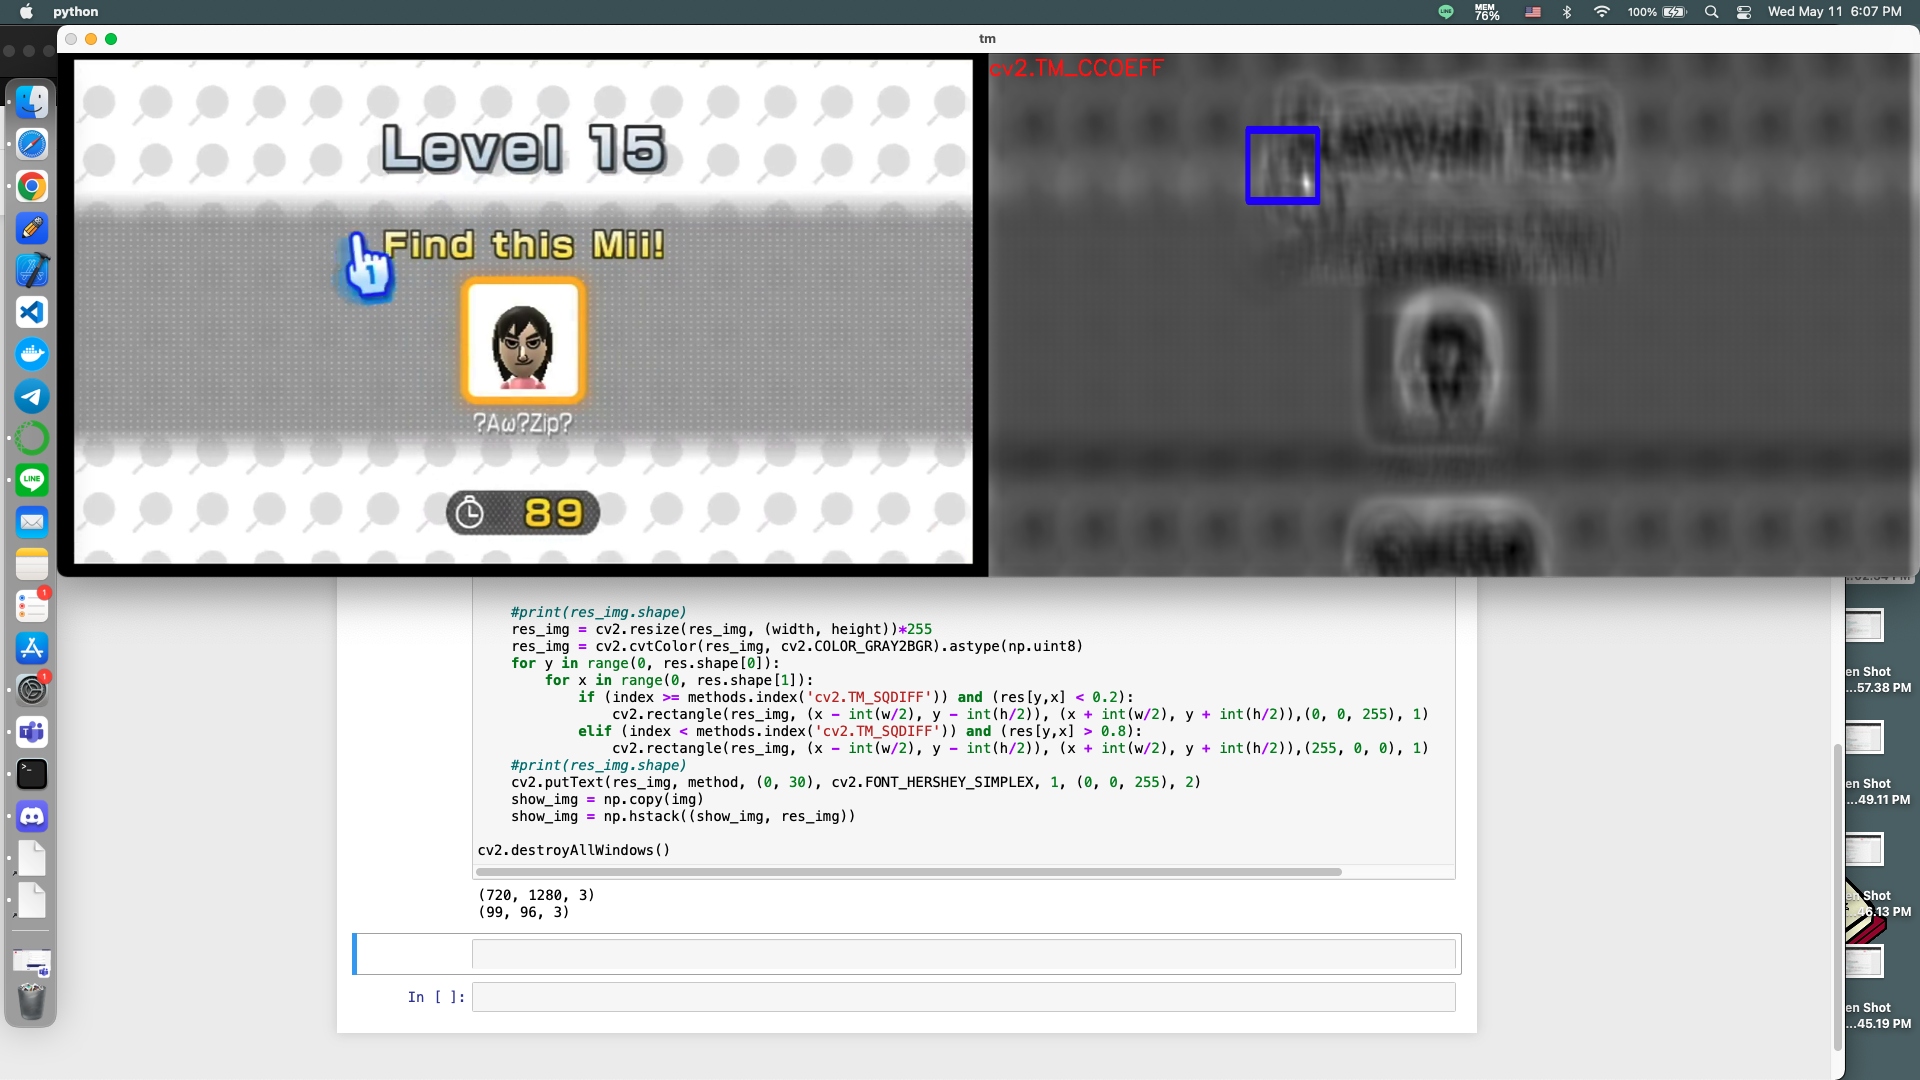